# 2.  The Simple Regression Model
## 2.1 Simple OLS Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Example 2.3: CEO Salary and Return to Equity 
#### Load the dataset

In [3]:
ceosall=pd.read_stata('./Data/CEOSAL1.DTA')

In [4]:
ceosall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 12 columns):
salary      209 non-null int16
pcsalary    209 non-null int16
sales       209 non-null float32
roe         209 non-null float32
pcroe       209 non-null float32
ros         209 non-null int16
indus       209 non-null int8
finance     209 non-null int8
consprod    209 non-null int8
utility     209 non-null int8
lsalary     209 non-null float32
lsales      209 non-null float32
dtypes: float32(5), int16(3), int8(4)
memory usage: 7.8 KB


In [5]:
ceosall.head(5)

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


In [6]:
roe_mean=ceosall.roe.mean()
print(roe_mean)

17.1842098236084


In [7]:
salary_mean=ceosall.salary.mean()
print(salary_mean)

1281.1196172248804


In [8]:
roe_var=ceosall.roe.var()
print(roe_var)

72.56497955322266


### Example 2.3: CEO Salary and Return on Equity

In [9]:
ceos_reg=smf.ols('salary~roe', data=ceosall).fit()

In [10]:
print(ceos_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Fri, 14 Dec 2018   Prob (F-statistic):             0.0978
Time:                        21:04:35   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.0

#### Regression Results

In [11]:
print(ceos_reg.params)

Intercept    963.191336
roe           18.501186
dtype: float64


### Example 2.3: CEO Salary and Return on Equity
#### Scatter Plot

/Users/dingxuanzhang/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'OLS Regression Line for Example 2-3')

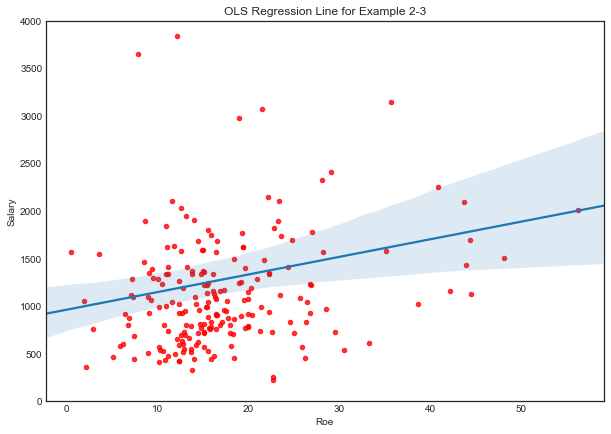

In [12]:
plt.figure(figsize=(10,7))
sns.regplot(ceosall.roe, ceosall.salary, order=1, ci=95,marker='o', scatter_kws={'color':'r', 's':20})
plt.ylim(bottom=0, top=4000)
plt.ylabel('Salary')
plt.xlabel('Roe')
plt.title('OLS Regression Line for Example 2-3')

### Example 2.4: Wage and Education
#### Load the dataset

In [13]:
wage1=pd.read_stata('./Data/WAGE1.DTA')

In [14]:
wage1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 525
Data columns (total 24 columns):
wage        526 non-null float32
educ        526 non-null int8
exper       526 non-null int8
tenure      526 non-null int8
nonwhite    526 non-null int8
female      526 non-null int8
married     526 non-null int8
numdep      526 non-null int8
smsa        526 non-null int8
northcen    526 non-null int8
south       526 non-null int8
west        526 non-null int8
construc    526 non-null int8
ndurman     526 non-null int8
trcommpu    526 non-null int8
trade       526 non-null int8
services    526 non-null int8
profserv    526 non-null int8
profocc     526 non-null int8
clerocc     526 non-null int8
servocc     526 non-null int8
lwage       526 non-null float32
expersq     526 non-null int16
tenursq     526 non-null int16
dtypes: float32(2), int16(2), int8(20)
memory usage: 20.5 KB


In [15]:
wage1.head(5)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [16]:
wage1_reg=smf.ols('wage~educ', data=wage1).fit()

In [17]:
print(wage1_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.78e-22
Time:                        21:04:35   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.1

#### Plot the regression

Text(0.5, 1.0, 'OLS Regression Line for Example 2.4')

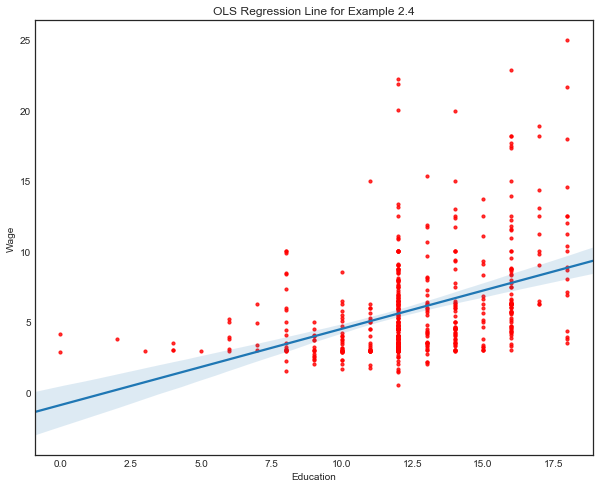

In [18]:
plt.figure(figsize=[10,8])
sns.regplot(wage1.educ, wage1.wage, order=1, ci=95, scatter_kws={'color':'r','s':10})
plt.xlabel('Education')
plt.ylabel('Wage')
plt.title('OLS Regression Line for Example 2.4')

### Example 2.5: Voting Outcomes and Campaign Expenditures
#### Load the dataset

In [19]:
vote1=pd.read_stata('./Data/VOTE1.DTA')

In [20]:
vote1.head(5)

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473


In [21]:
Voteres=smf.ols('voteA~shareA', data=vote1).fit()
print(Voteres.summary())

                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           6.63e-74
Time:                        21:04:36   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887     30.221      0.0

#### Plot the regression line

Text(0.5, 1.0, 'OLS regression line for Example 2-5')

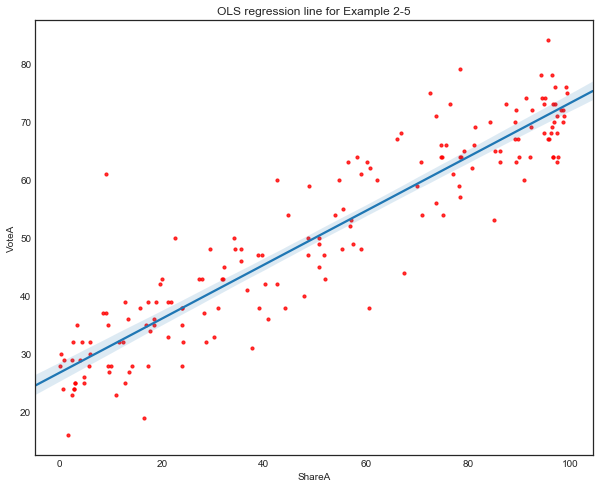

In [22]:
plt.figure(figsize=[10,8])
sns.regplot(vote1.shareA, vote1.voteA, order=1, ci=95, scatter_kws={'color':'r','s':10})
plt.xlabel('ShareA')
plt.ylabel('VoteA')
plt.title('OLS regression line for Example 2-5')

## 2.2 Coefficients, Fitted Values, and Residuals
### Example 2.6: CEO Salary and Return on Equity
#### Obtain Predicted Values and Residuals

In [23]:
salary_hat=pd.DataFrame({'Estimated Salary':ceos_reg.predict()})

In [24]:
u_hat=pd.DataFrame({'Residuals':ceos_reg.resid})

In [25]:
Table_2_2=pd.concat([ceosall.roe, ceosall.salary, salary_hat,u_hat], axis=1)

In [26]:
Table_2_2.head(5)

,roe,salary,Estimated Salary,Residuals
0,14.1,1095,1224.058071,-129.058071
1,10.9,1001,1164.854261,-163.854261
2,23.5,1122,1397.969216,-275.969216
3,5.9,578,1072.348338,-494.348338
4,13.8,1368,1218.507712,149.492288


### Example 2.7: Wage and Education
#### Obtain coefficients, predicted values and residuals

In [27]:
b_hat=wage1_reg.params

In [28]:
wage_hat=wage1_reg.predict()

In [29]:
u_hat=wage1_reg.resid

#### Confirm property (1) 

In [30]:
u_hat.mean()

-2.5210083281602413e-15

#### Confirm property (2)

In [31]:
np.corrcoef(wage1.educ, u_hat)

array([[ 1.00000000e+00, -1.27435783e-16],
       [-1.27435783e-16,  1.00000000e+00]])

#### Confirm property (3)

In [32]:
wage1.wage.mean()

5.896100044250488

In [33]:
b_hat[0]+b_hat[1]*wage1.educ.mean()

5.896102674787037

## 2.3. Goodness of Fit
### Example 2.8: CEO Salary and Return on Equity
#### Calculate $R^2$ in three different ways

In [34]:
np.var(ceos_reg.predict())/np.var(ceosall.salary)

0.013188624081034103

In [35]:
1-np.var(ceos_reg.resid)/np.var(ceosall.salary)

0.013188624081033828

In [36]:
np.corrcoef(ceosall.salary, ceos_reg.predict())[0][1]**2

0.013188624081034103

### Example 2.9: Voting Outcomes and Campaign Expenditures

In [37]:
print(Voteres.summary())

                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           6.63e-74
Time:                        21:04:36   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887     30.221      0.0

#### Calculate $R^2$ manually

In [38]:
np.var(Voteres.predict())/np.var(vote1.voteA)

0.8561408655827666

## 2.4. Nonlinearity
### Example 2.10: Wage and Education

In [39]:
wage1_logreg=smf.ols('np.log(wage)~educ', data=wage1).fit()
print(wage1_logreg.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           3.27e-25
Time:                        21:04:37   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.0

/Users/dingxuanzhang/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'OLS of nonlinear regression')

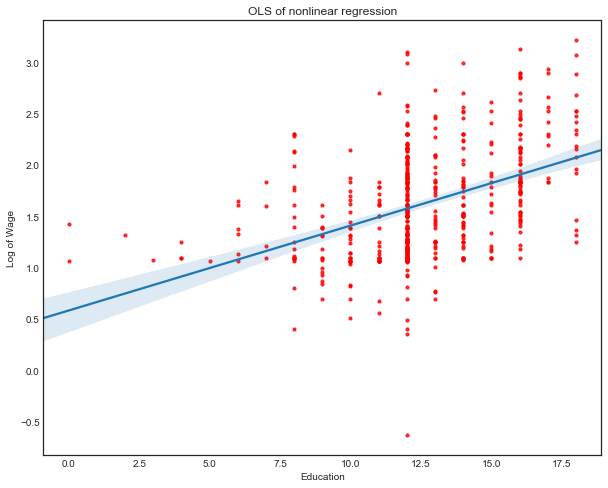

In [40]:
plt.figure(figsize=[10,8])
sns.regplot(wage1.educ, np.log(wage1.wage),order=1, ci=95, scatter_kws={'color':'r','s':10})
plt.xlabel('Education')
plt.ylabel('Log of Wage')
plt.title('OLS of nonlinear regression')

### Example 2.11: CEO Salary and Firm Sales
#### Estimate log-log model

In [41]:
ceos_log_log=smf.ols('np.log(ceosall.salary)~np.log(ceosall.sales)', data=ceosall).fit()
print(ceos_log_log.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(ceosall.salary)   R-squared:                       0.211
Model:                                OLS   Adj. R-squared:                  0.207
Method:                     Least Squares   F-statistic:                     55.30
Date:                    Fri, 14 Dec 2018   Prob (F-statistic):           2.70e-12
Time:                            21:04:37   Log-Likelihood:                -152.50
No. Observations:                     209   AIC:                             309.0
Df Residuals:                         207   BIC:                             315.7
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

(-4874.973581199702, 30000)

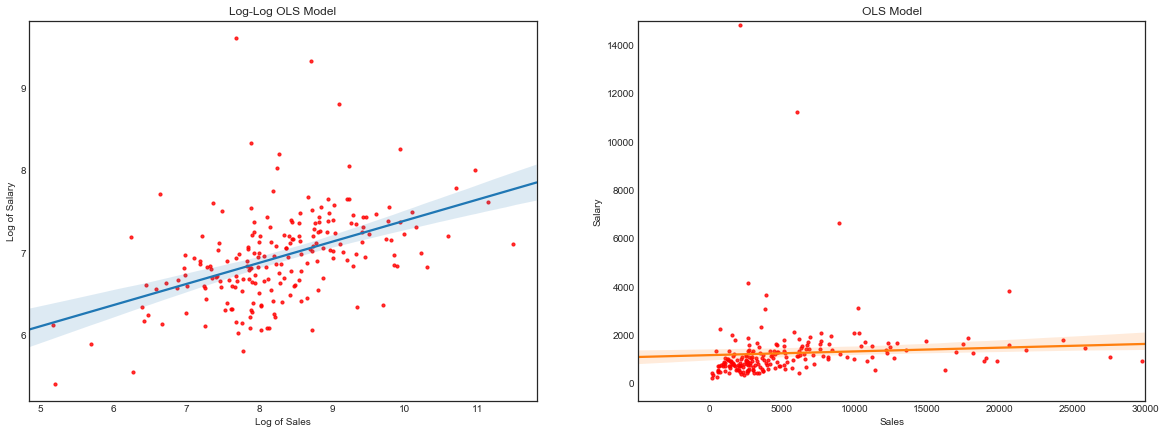

In [42]:
f, (ax1, ax2)=plt.subplots(1,2)
f.set_figheight(7)
f.set_figwidth(20)

sns.regplot(np.log(ceosall['sales']), np.log(ceosall['salary']), ax=ax1, order=1,data=ceosall,ci=95, scatter_kws={'color':'r','s':10})
sns.regplot(ceosall.sales, ceosall.salary, data=ceosall,ax=ax2, order=1, ci=95, scatter_kws={'color':'r','s':10})
ax1.set_title('Log-Log OLS Model')
ax2.set_title('OLS Model')
ax1.set_xlabel('Log of Sales')
ax1.set_ylabel('Log of Salary')
ax2.set_xlabel('Sales')
ax2.set_ylabel('Salary')
ax2.set_ylim(top=15000)
ax2.set_xlim(right=30000)

## Regression through the Origin and Regression on a constant

### Example 2.12 SLO-Origin-Const

#### Usual OLS regression

In [43]:
reg1=smf.ols('salary~roe', data=ceosall).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Fri, 14 Dec 2018   Prob (F-statistic):             0.0978
Time:                        21:08:17   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.0

#### Regression without intercept through origin

In [44]:
reg2=smf.ols('salary~0+roe', data=ceosall).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     151.9
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           1.46e-26
Time:                        21:09:22   Log-Likelihood:                -1814.4
No. Observations:                 209   AIC:                             3631.
Df Residuals:                     208   BIC:                             3634.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
roe           63.5380      5.156     12.324      0.0

#### Regression without slope (on a constant)

In [45]:
reg3=smf.ols('salary~1', data=ceosall).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Fri, 14 Dec 2018   Prob (F-statistic):                nan
Time:                        21:18:53   Log-Likelihood:                -1805.9
No. Observations:                 209   AIC:                             3614.
Df Residuals:                     208   BIC:                             3617.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1281.1196     94.927     13.496      0.0

/Users/dingxuanzhang/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


## Expected Values, Variances, and Standard Errors

### Example 2.12: Student Math Performance and the School Lunch Program

#### Load the data

In [48]:
meap93=pd.read_stata('./Data/MEAP93.DTA')
meap93.head(5)

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.599998,5765,37498.0,7420,2.9,89.199997,56.400002,67.900002,44918.0,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.3,11355,101.199997,6601,48722.0,10370,1.3,91.400002,42.700001,65.300003,59092.0,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.7,7685,114.000000,6834,44541.0,7313,3.5,91.400002,43.799999,54.299999,51854.0,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.4,1148,85.400002,3586,31566.0,5989,3.6,86.599998,25.299999,60.000000,37555.0,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.4,1572,96.099998,3847,29781.0,5545,0.0,100.000000,15.300000,65.800003,35326.0,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626


In [49]:
results=smf.ols('math10~lnchprg', data=meap93).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     83.77
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           2.75e-18
Time:                        22:01:47   Log-Likelihood:                -1499.3
No. Observations:                 408   AIC:                             3003.
Df Residuals:                     406   BIC:                             3011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.1427      0.998     32.221      0.0

##### Number of Observations

In [50]:
print(results.nobs)

408.0


##### Standard Error of the regression

In [52]:
SER=np.std(results.resid)*np.sqrt((results.nobs-1)/(results.nobs-2))
print(SER)

9.554208303679339


##### Standard Error of $\beta_0$ and $\beta_1$, respectively.

In [53]:
SE1=SER/np.std(meap93.lnchprg)/np.sqrt(results.nobs-1)*np.sqrt(np.mean(meap93.lnchprg**2))
print(SE1)

0.997582565829819


In [55]:
SER2=SER/np.std(meap93.lnchprg)/np.sqrt(results.nobs-1)
print(SER2)

0.03483934270307207


## Computer Exercises

### C2.1 